# Wstęp do sieci neuronowych


<img src="figures/L9/cat_neuron.jpg" width=500>

Ref: 

* http://cs231n.github.io/optimization-1/ 

* https://tgmstat.wordpress.com/2013/05/15/third-week-of-courseras-machine-learning/

* https://github.com/peterroelants/peterroelants.github.io/blob/master/notebooks/neural_net_implementation/neural_network_implementation_part02.ipynb


Na dzisiejszych zajęciach omówimy jak można zaimplementować jako sieć neuronową znany nam model regresji logistycznej, najpierw bardziej ręcznie a potem mniej. Omówimy na końcu spojrzenie na sieci neuronowe z perspektywy uczenia reprezentacji.

In [27]:
# Python imports
import numpy as np # Matrix and vector computation package
np.seterr(all='ignore') # ignore numpy warning like multiplication of inf
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

In [28]:
def logistic(z): 
    return 1 / (1 + np.exp(-z))

def nn(x, w): 
    return logistic(x.dot(w.T))

def nn_predict(x,w): 
    return np.around(nn(x,w))

def cost(y, t):
    return - np.sum(np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

In [22]:
# Define and generate the samples
nb_of_samples_per_class = 20  # The number of sample in each class
red_mean = [-1,0]  # The mean of the red class
blue_mean = [1,0]  # The mean of the blue class
std_dev = 1.2  # standard deviation of both classes
# Generate samples from both classes
x_red = np.random.randn(nb_of_samples_per_class, 2) * std_dev + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) * std_dev + blue_mean

# Merge samples in set of input variables x, and corresponding set of output variables t
X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)), np.ones((nb_of_samples_per_class,1))))

# Siec Neuronowa, a regresja logistyczna

Przypomnijmy sobie co robi regresja logistyczna. Z L7:

Przekształcając $$ \log(o) = \sum \theta_i x_i $$ otrzymujemy *bezpośrednio*, że $$ p(y | x) = \mbox{sigmoid}(\sum \theta_i x_i) $$, gdzie $sigmoid(a) = \frac{1}{1 + \exp(-a)}$.

Można ostatni wzór zapisać w postaci "sieci neuronowej":

<center><img width=500 src="figures/L9/logreg.png"></center>

To co pozostaje to jak wyznaczyć wagi przez optymalizacją. Przypomnijmy, że szukamy parametrów optymalizujących log-likelihood $$ LL(\hat y, y) = CE(\hat y, y) = \sum_{i=1}^{N} y \log\hat(y) $$. W regresji liniowej było prosto!

[Opisać/wyjaśnic cross entropy]

## Czego szuka regresja logistyczna

Regresja logistyczna dostaje kare za najdrobniejsza pomyłkę. Jeśli dla kasy 1 mówi z pewnością 99%, to dalej będzie niezerowy koszt:
    
<img width=500 src="figures/L9/logreg_vs_svm.png">

## Optymalizacja

Jak dotad nie rozpatrywaliśmy optymalizacji. Regresja liniowa ma rozwiązanie "zamknięte", ale nie wiemy jak optymalizować błąd regresji logistycznej!

$$ \theta^* = argmax_{\theta} L(p( \hat y | x, \theta), y) = CE(p(\hat y | x, \theta), y) = \sum_{i=1}^{N} y \log\hat(y) $$.

Dla klas binarnych:

$$ \sum_{i=1}^N y_i \log \hat y_i - (1 - y_i) \log (1 - \hat y_i ) $$

Jak znaleźć $\theta^*$? Użyjemy metody gradientowej:

$$ \theta^{t+1} = \theta^{t} - \alpha \frac{\partial L}{\partial \theta} $$

### Funkcja kosztu nie jest już taka prosta!

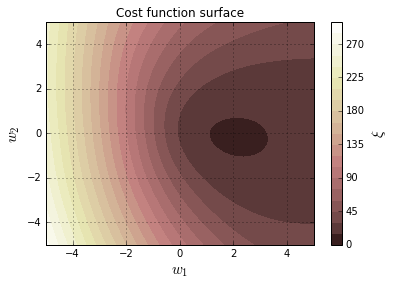

In [17]:
# Plot the cost in function of the weights
# Define a vector of weights for which we want to plot the cost
nb_of_ws = 100 # compute the cost nb_of_ws times in each dimension
ws1 = np.linspace(-5, 5, num=nb_of_ws) # weight 1
ws2 = np.linspace(-5, 5, num=nb_of_ws) # weight 2
ws_x, ws_y = np.meshgrid(ws1, ws2) # generate grid
cost_ws = np.zeros((nb_of_ws, nb_of_ws)) # initialize cost matrix

# Fill the cost matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)
        
# Plot the cost function surface
plt.contourf(ws_x, ws_y, cost_ws, 20, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

### Implementacja SGD

[Wyprowadzić na tablicy wzór na dLL/dtheta_i]

Jak właśnie pokazaliśmy $$ \frac{\partial L}{\partial \theta_i} = x_j (\hat y_i - t_i) $$

[Interpretacja geometryczna gradientu regresji logistycznej]

### Zadanie 1, Nauka regresji logistycznej przez SGD [2pkt]

In [29]:
def gradient(w, x, t): 
    # Twoj kod

def delta_w(w_k, x, t, learning_rate):
    # Twoj kod

# Parametry uczenia 
w = np.asmatrix([-4, -2])
learning_rate = 0.05

# Uczenie
nb_of_iterations = 10 
w_iter = [w] 
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) 
    w = w - dw 
    w_iter.append(w)  

IndentationError: expected an indented block (<ipython-input-29-31eadd46345e>, line 4)

In [26]:
# Oczekiwany efekt
w_iter

[matrix([[-4, -2]]),
 matrix([[-1.80541623, -1.74734667]]),
 matrix([[ 0.1128423 , -1.28917056]]),
 matrix([[ 1.10408732, -0.67896984]]),
 matrix([[ 1.38967146, -0.35893159]]),
 matrix([[ 1.54218012, -0.16531948]]),
 matrix([[ 1.65159999, -0.02802461]]),
 matrix([[ 1.73918545,  0.07434667]]),
 matrix([[ 1.81303435,  0.15278665]]),
 matrix([[ 1.87700399,  0.21417066]]),
 matrix([[ 1.93325094,  0.26312608]])]

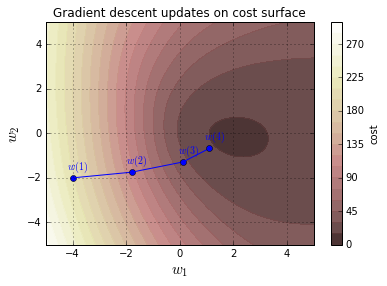

In [25]:
# Plot the first weight updates on the error surface
# Plot the error surface
plt.contourf(ws_x, ws_y, cost_ws, 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('cost')

# Plot the updates
for i in range(1, 4): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # Plot the weight-cost value and the line that represents the update
    plt.plot(w1[0,0], w1[0,1], 'bo')  # Plot the weight cost value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'b-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(i), color='b')
w1 = w_iter[3]  
# Plot the last weight
plt.plot(w1[0,0], w1[0,1], 'bo')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(4), color='b') 
# Show figure
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

In [ ]:
## TODO: to samo na MNIST

# keras

Sieci neuronowe definiujemy prawie tak prosto jak funkcje w Pythonie, a pochodne (to co liczyłem na tablicy) powinien nam liczyć komputer!

## Zadanie 2, Prosta modyfikacja [1pkt]

Zmodyfikuj powyższą sieć tak aby miała 2 warstwy i naucz ją na smallMNIST. Czy dla jakiegoś rozmiaru ukrytej warstwy osiąga lepszy wynik?

# Inne sieci neuronowe

Najprostsze co możemy zrobić to dodać warstwy. Po co omówimy w następnym rozdziale.

<img width=600 src="figures/L9/zoo.jpg">

# Znaczenie reprezentacji, kNN

Najproszym argumentem po co te sieci jest możliwość uczenia się lepszych reprezentacji niż pixele, czy ręczne cechy w zbiorze danych breast cancer. Omówimy to na przykładzie zbiorów danych: iris i MNIST oraz klasyczngo modelu kNN.

Uruchomimy najpierw model kNN na danych iris

<img width=600 src="https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png">

In [7]:
keras.__version__

NameError: name 'keras' is not defined

In [6]:
import matplotlib.pylab as plt
import numpy as np
import os
os.environ['KERAS_BACKEND'] = 'theano'
from keras.datasets import mnist
import tqdm
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

ImportError: cannot import name image_data_format

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

NameError: name 'mnist' is not defined

In [1]:
def f(x):
    current_best = -1, 100000
    for id in range(len(x_train)):
        dist = np.linalg.norm(x - x_train[id])
        if dist < current_best[1]:
            current_best = (id, dist)
            
    return y_train[current_best[0]]

In [ ]:
# TODO: Zadanie o knn?